## Gerekli Kütüphaneler

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"

## Veri Setinin Eklenmesi

In [2]:
df = pd.read_csv('musteriler.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        200 non-null    int64 
 1   Cinsiyet  200 non-null    object
 2   Yas       200 non-null    int64 
 3   Hacim     200 non-null    int64 
 4   Maas      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


## Veri Ön İşleme

In [3]:
x = df.iloc[:,3:].values
y = df['Maas'].values

## Sınıflandırma Modeli

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(x)
print(kmeans.cluster_centers_)

[[ 58911.76470588   5865.44117647]
 [104386.95652174   7289.13043478]
 [ 22282.55813953   5310.75581395]]


## Modelin Değerlendirilmesi

In [5]:
sonuclar = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    sonuclar.append(kmeans.inertia_) ## wcss değerleri

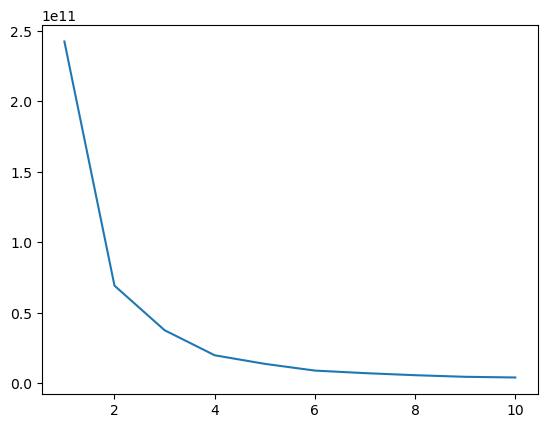

In [6]:
plt.plot(range(1,11),sonuclar)